In [1]:
'''In Deep Learning L2 Regularization is batter then  L1 Regularization'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

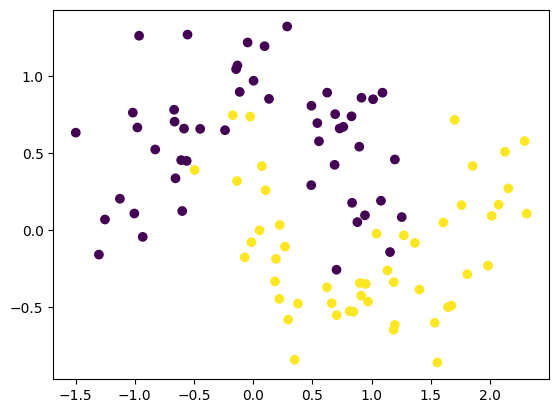

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

d:\PYTHON_environment\ENV2\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [6]:
history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


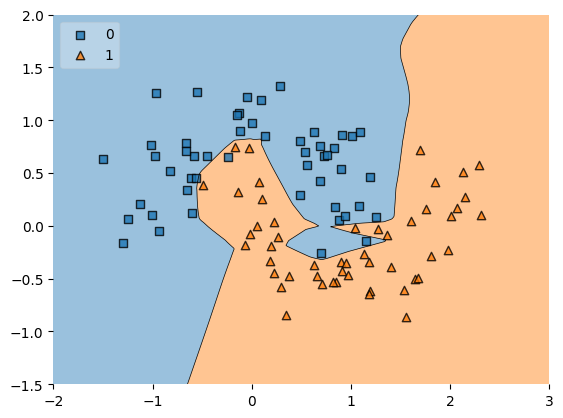

In [7]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

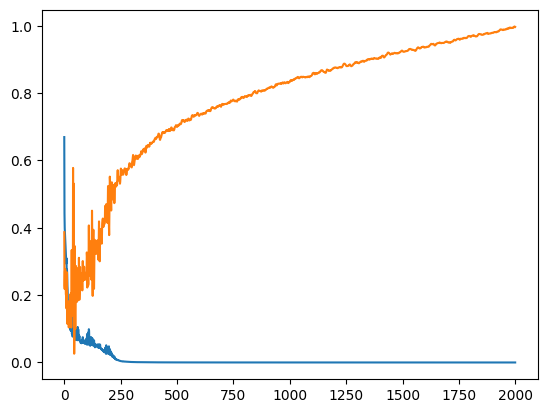

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [9]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.003)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.003)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])



In [11]:
history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 849us/step


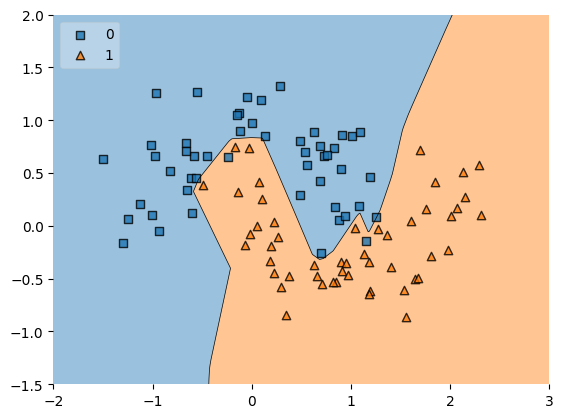

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

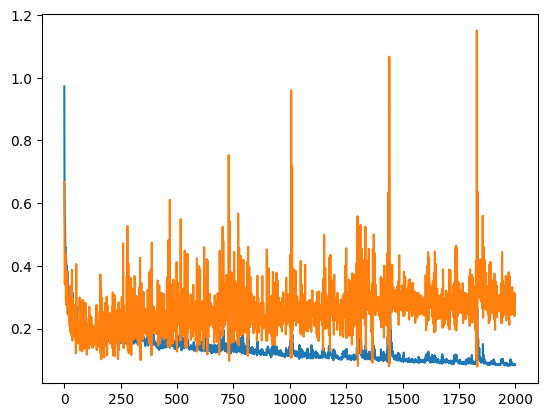

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [14]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

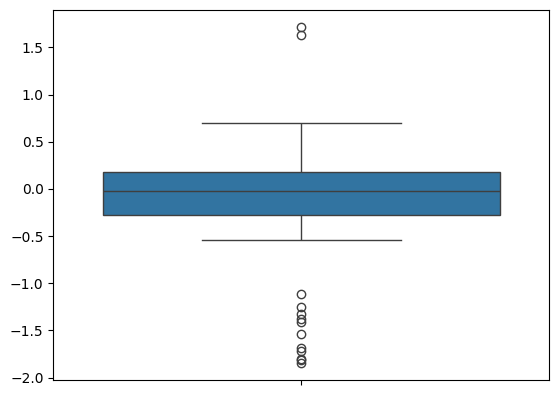

In [15]:
sns.boxplot(model1_weight_layer1)

<Axes: >

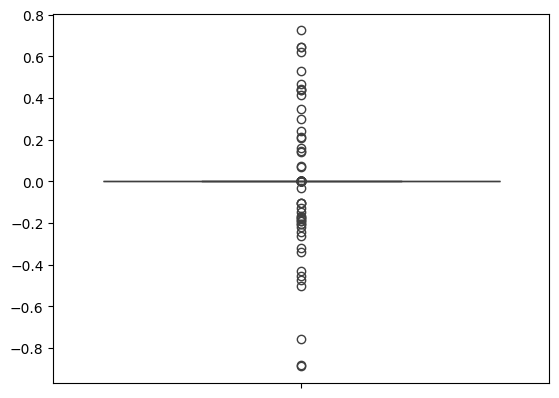

In [16]:
sns.boxplot(model2_weight_layer1)

In [17]:
model1_weight_layer1.min()

np.float32(-1.8439502)

In [18]:
model2_weight_layer1.min()

np.float32(-0.8871951)

C:\Users\subhadip sinha\AppData\Local\Temp\ipykernel_18404\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\subhadip sinha\AppData\Local\Temp\ipykernel_18404\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

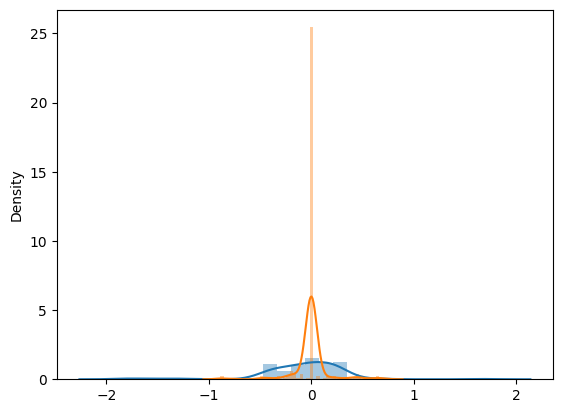

In [19]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [20]:
model1.get_weights()[0].reshape(256)

array([ 6.04605079e-02,  1.16267189e-01, -2.93727349e-02,  3.81193161e-01,
       -3.86387378e-01, -6.62282924e-04,  2.59870499e-01, -4.17893559e-01,
       -4.23411459e-01,  1.78854778e-01, -3.47685158e-01, -3.81495386e-01,
       -1.50742665e-01, -4.05435339e-02,  2.13052273e-01, -4.13012356e-01,
        5.15182223e-03, -1.26482978e-01,  1.05434209e-01,  1.57342687e-01,
       -3.03736717e-01,  7.84870088e-02,  2.04684779e-01, -9.08234194e-02,
        3.88858706e-01,  2.02461720e-01,  1.53244749e-01,  1.20212279e-01,
        1.42859623e-01, -4.69133347e-01,  7.01590031e-02, -4.06400859e-01,
       -7.19661266e-02,  2.54113942e-01, -3.94868612e-01,  2.92035073e-01,
        4.67385650e-02, -1.05818540e-01,  2.82533228e-01,  2.72156686e-01,
       -3.79800081e-01, -3.16639304e-01,  3.35094072e-02,  2.31988668e-01,
       -1.27499728e-02, -1.59215808e-01, -4.59776759e-01, -2.94348955e-01,
       -4.46089692e-02,  5.00162877e-02, -4.65450019e-01,  2.17555135e-01,
        2.28181317e-01, -